In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
import random

# Returns true if 3 of a kind, false otherwise
def check_if_three_of_a_kind(hand):
    for x in range(5):
        hand[x] = hand[x][0]
    npHand = np.array(hand)
    npHand, count = np.unique(npHand, return_counts=True)
    if np.array_equal(count, [3,1,1]) or np.array_equal(count, [1,3,1]) or np.array_equal(count, [1,1,3]):
        return True
    else:
        return False

# Creates a 52 card deck
deck = ["AC", "2C", "3C", "4C", "5C", "6C", "7C", "8C", "9C", "0C", "JC", "QC", "KC", "AD", "2D", "3D", "4D", "5D", "6D", "7D", "8D", "9D", "0D", "JD", "QD", "KD", "AH", "2H", "3H", "4H", "5H", "6H", "7H", "8H", "9H", "0H", "JH", "QH", "KH", "AS", "2S", "3S", "4S", "5S", "6S", "7S", "8S", "9S", "0S", "JS", "QS", "KS"]
# Tracks how many 3 of a kind are drawn
handCount = 0

# Draws 10000 hands, checks if each hand is 3 of a kind, adds to handCount if true
for x in range(10000):
    hand = random.sample(deck, 5)
    if check_if_three_of_a_kind(hand) == True:
        handCount = handCount + 1
        
print("According to the simulation, the probability of drawing a three of a kind is approximately", handCount/10000)
print("This is consistent with the calculated probability from Part A of the problem:", 88/4165)
    

According to the simulation, the probability of drawing a three of a kind is approximately 0.0209
This is consistent with the calculated probability from Part A of the problem: 0.02112845138055222


In [3]:
def prob_four(n):

    # your code goes here!
    n = int(n)
    numerator = 28 / 40
    denominator = 11/20
    iteration = 1
    while iteration < n:
        denominator = denominator * (11/20)
        iteration = iteration + 1

    denominator = denominator * (12 / 40) 
    denominator = denominator + (28 / 40)
    prob = numerator / denominator
    return(prob)

In [4]:
print("This formula correctly equates the probability for n=1 at", prob_four(1))
print("Then, at n=5, the formula equates a probability of", prob_four(5))

This formula correctly equates the probability for n=1 at 0.8092485549132947
Then, at n=5, the formula equates a probability of 0.9788860827002293


In [5]:
import random

def miniopoly_turn(location, cash, in_jail):
    # Rolling two dice
    r1 = random.randint(1,6)
    r2 = random.randint(1,6)
    # Checking if the player began their turn in jail
    if in_jail == True:
        if r1 != r2:
            cash -= 20
        else:
            in_jail = False
    if in_jail == False:
        # Checking if the player passed or landed on go
        if ((location + r1 + r2) % 40) < location:
            cash += 200
        # Moving player equal to their roll
        location = (location + r1 + r2) % 40
    # Executing rules based on the space landed on
    if location in [2, 7, 17, 22, 33, 36]:
        card = random.randint(1,5)
        if card == 1:
            cash += 50
        elif card == 2:
            cash += 100
        elif card == 3:
            cash += 200
        elif card == 4:
            cash -= 50
        else:
            cash -= 100
    elif location == 30:
        location = 10
        in_jail = True
    elif location == 0 or location == 10 or location == 20:
        pass
    else:
        cash -= location
    # Adjusting cash to 0 in the case of bankrupcy
    if cash <= 0:
        cash = 0
    return location, cash, in_jail

<AxesSubplot:>

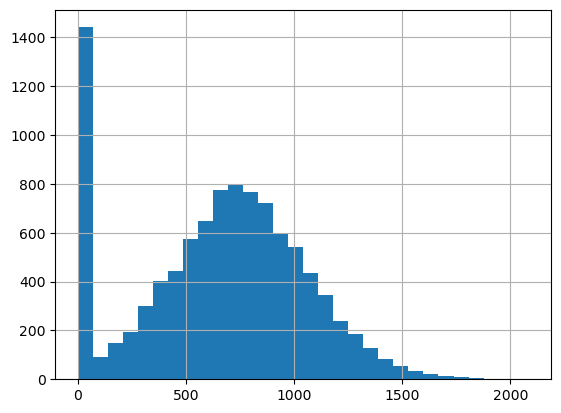

In [6]:
def simulate_game(num_turns):
    # Setting starting variables
    location = 0
    cash = 200
    curr_turn = 1
    in_jail = False
    
    # Simulating game
    while (curr_turn <= num_turns) and (cash > 0):
        location, cash, in_jail = miniopoly_turn(location, cash, in_jail)
        curr_turn += 1
    
    return cash

num_games = 10000
num_turns = 30
ending_cash = np.zeros(num_games)
for x in range(num_games):
    ending_cash[x] = simulate_game(num_turns)
    
cashpd = pd.Series(ending_cash)
cashpd.hist(bins=30)

In [7]:
num_games = 10000
num_turns = 30
num_games_bankrupt = 0
for x in range(num_games):
    if simulate_game(num_turns) == 0:
        num_games_bankrupt += 1

# Calculating and printing the bankrupcy probability
bankrupt_prob = num_games_bankrupt / num_games
print("The simulated probability of going bankrupt is", bankrupt_prob)

The simulated probability of going bankrupt is 0.1449


In [8]:
def jail_game(num_turns):
    found_jail_game = False
    location = 0
    cash = 200
    curr_turn = 1
    in_jail = False
    
    # Simulating game
    while (curr_turn <= num_turns) and (cash > 0):
        location, cash, in_jail = miniopoly_turn(location, cash, in_jail)
        curr_turn += 1
        # Checking if the player has gone to jail this game
        if in_jail == True:
            found_jail_game = True
    
    if found_jail_game == True:
        return cash
    else:
        return jail_game(num_turns)
    
# Simulating jail games
num_games = 10000
num_turns = 30
num_games_bankrupt = 0
for x in range(num_games):
    if jail_game(num_turns) == 0:
        num_games_bankrupt += 1

# Calculating and printing the probability
bankrupt_given_jail_prob = num_games_bankrupt / num_games
print("The simulated probability of going bankrupt given you went to jail that game is", bankrupt_given_jail_prob)

The simulated probability of going bankrupt given you went to jail that game is 0.1966


In [9]:
def calculate_jail_prob(num_turns):
    # Setting starting variables
    found_jail_game = False
    location = 0
    cash = 200
    curr_turn = 1
    in_jail = False
    
    # Simulating game
    while (curr_turn <= num_turns) and (cash > 0):
        location, cash, in_jail = miniopoly_turn(location, cash, in_jail)
        curr_turn += 1
        # Checking if the player has gone to jail this game
        if in_jail == True:
            found_jail_game = True
            
    return found_jail_game

# Calculating the probability of going to jail during a game
# Given the probability of going to jail is low,
# we run 100000 games instead of 10000 for a more accurate probability
num_games = 100000
num_turns = 30
num_jail_games = 0
for x in range(num_games):
    if jail_game(num_turns) == 1:
        num_jail_games += 1

# Making calculating and saving probability in a variable
jail_prob = (num_jail_games / num_games)

# Calculating and printing the prob using Bayes' Theorem
jail_given_bankrupt_prob = ((bankrupt_given_jail_prob * jail_prob) / bankrupt_prob)
print("The probability the player went to jail given they went bankrupt is", jail_given_bankrupt_prob)

The probability the player went to jail given they went bankrupt is 0.00020351966873706002


In [10]:
def close_rolls_sim(num_rolls, is_close):
    die = np.array([1,2,3,4,5,6])
    closeCount = 0

    for x in range(num_rolls):
        r1 = np.random.choice(die)
        r2 = np.random.choice(die)
        if (r1 >= r2 - 1) and (r1 <= r2 + 1):
            closeCount += 1
            is_close[x] = 1
        else:
            is_close[x] = 0
    
    close_roll_prob = closeCount / num_rolls
    return close_roll_prob, is_close

num_rolls = 50000
is_close = np.zeros(num_rolls)
close_rolls_prob, is_close = close_rolls_sim(num_rolls, is_close)

print("The simulated probability of close pair rolls is", close_rolls_prob)
print("Compare this to the actual probability:", 4/9)
print("Simulating 50000 cases returns a probability quite accurate to the previously calculated probability.")

The simulated probability of close pair rolls is 0.44446
Compare this to the actual probability: 0.4444444444444444
Simulating 50000 cases returns a probability quite accurate to the previously calculated probability.


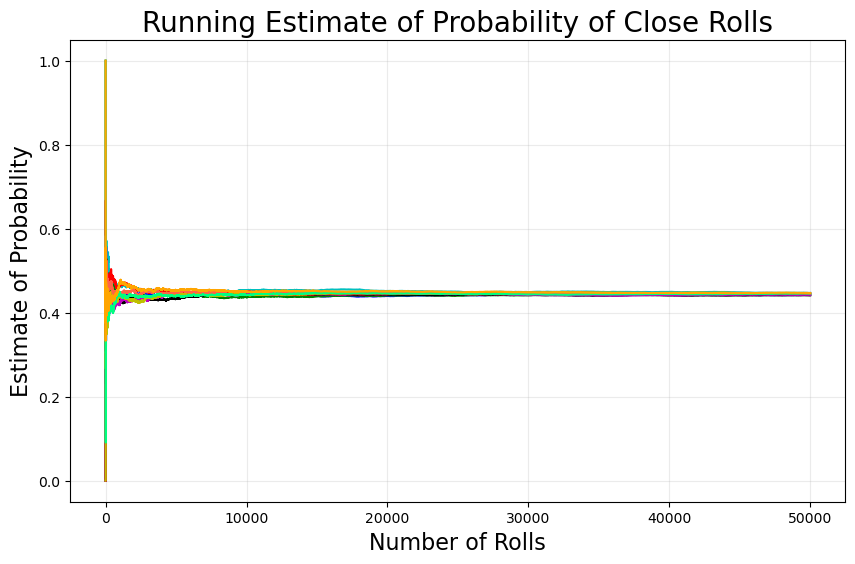

In [11]:
# defining ax
fig, ax= plt.subplots(figsize=(10,6))

# defining variables
num_rolls = 50000
close_rolls_prob = 0
colors = ["b", "c", "g", "k", "m", "r", "y", "tomato", "springgreen", "orange"]

# Running Sims
for sim in range(10):
    close_rolls_prob, is_close = close_rolls_sim(num_rolls, is_close)
    running_est = np.zeros(len(is_close))
    for x in range(len(running_est)):
        running_est[x] = np.sum(is_close[:x+1] == 1) / len(running_est[:x+1])
    # plotting the terms runing_est
    ax.plot(running_est, color=colors[sim])

# put labels on the axes and give the graph a title.
ax.set_title("Running Estimate of Probability of Close Rolls", fontsize=20)
ax.set_xlabel("Number of Rolls", fontsize=16)
ax.set_ylabel("Estimate of Probability", fontsize=16)

# put a faded grid behind the graphic
ax.grid(True, alpha=0.25)